In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir,'..')))

In [19]:
from scripts.data_load import load_data
from scripts.data_visualization import *
import pandas as pd
import ipaddress

In [3]:
# Load data
fraud_data = load_data('../data/Fraud_Data.csv')
credit_data = load_data('../data/creditcard.csv')
ip_country = load_data('../data/IpAddress_to_Country.csv')

**Handle Missing Values**

In [4]:
# Check for missing values
print(fraud_data.isnull().sum())
print(credit_data.isnull().sum())

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Impute missing values
fraud_data['age'].fillna(fraud_data['age'].median(), inplace=True)
fraud_data['source'].fillna(fraud_data['source'].mode()[0], inplace=True)

# Drop rows with missing critical data
fraud_data.dropna(subset=['user_id', 'purchase_time', 'class'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15980\1688632417.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fraud_data['age'].fillna(fraud_data['age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_15980\1688632417.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

**Data Cleaning**

In [7]:
# Remove duplicates
fraud_data.drop_duplicates(subset=['user_id', 'purchase_time'], inplace=True)

# Correct data types
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['class'] = fraud_data['class'].astype('category')

**Exploratory Data Analysis (EDA)**

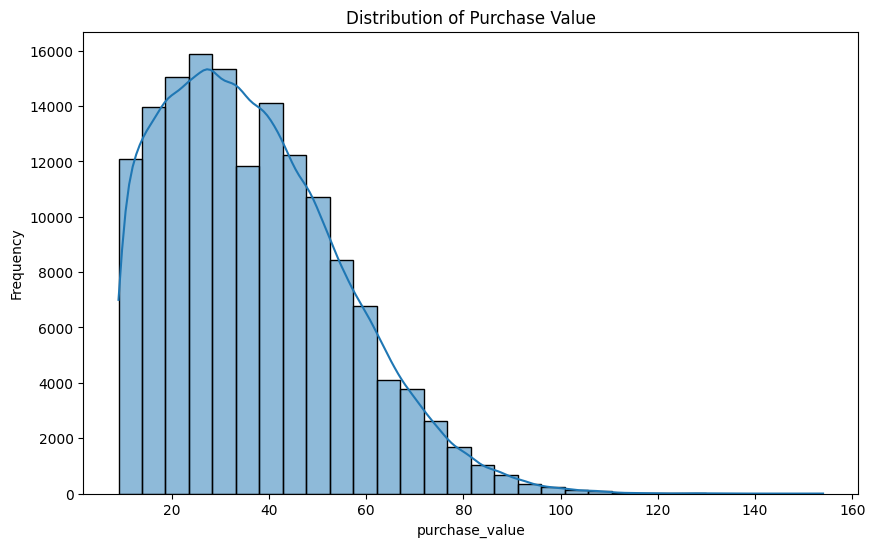

In [10]:
plot_univariate(fraud_data,'purchase_value','Distribution of Purchase Value')

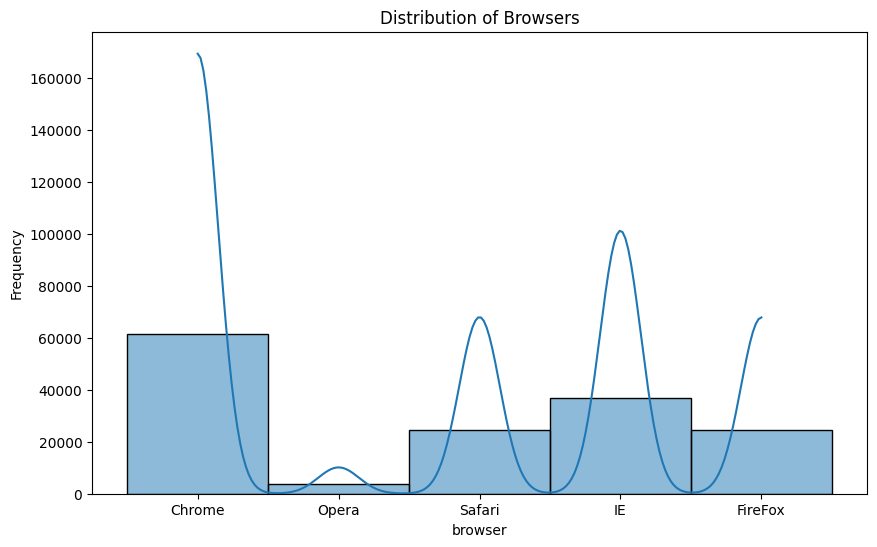

In [11]:
plot_univariate(fraud_data,'browser','Distribution of Browsers')

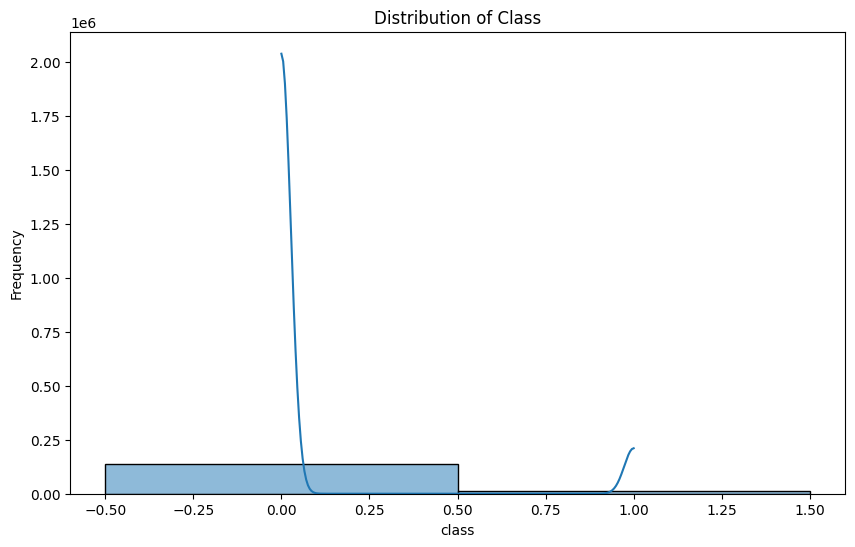

In [18]:
plot_univariate(fraud_data,'class','Distribution of Class')

**Merge Datasets for Geolocation Analysis**

In [ ]:
# Merge datasets
fraud_data['country'] = None
for _, row in ip_country.iterrows():
    mask = (fraud_data['ip_address'] >= row['lower_bound_ip_address']) & (fraud_data['ip_address'] <= row['upper_bound_ip_address'])
    fraud_data.loc[mask, 'country'] = row['country']